In [1]:
#carregando os pacotes necessarios
import pandas as pd
import sklearn as sl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#carregando o dataset
treino = pd.read_csv('treino.csv')

In [3]:
treino

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.00,195.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
5,13,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
6,14,2,27,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
7,18,2,26,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
8,20,2,45,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0
9,23,2,25,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,356463.060000,0


In [4]:
#verificando o tipo de dados do dataset
treino.dtypes

ID                                 int64
var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0      

In [5]:
#convertendo a coluna id como indice
treino.index = treino['ID']

In [6]:
#apagando a coluna id
del treino['ID']

In [7]:
#verificando a quantidade de 0 nas colunas
(treino==0).sum(axis=0)

var3                                75
var15                                0
imp_ent_var16_ult1               72301
imp_op_var39_comer_ult1          66075
imp_op_var39_comer_ult3          64330
imp_op_var40_comer_ult1          75725
imp_op_var40_comer_ult3          75672
imp_op_var40_efect_ult1          75982
imp_op_var40_efect_ult3          75975
imp_op_var40_ult1                75791
imp_op_var41_comer_ult1          66226
imp_op_var41_comer_ult3          64480
imp_op_var41_efect_ult1          69336
imp_op_var41_efect_ult3          67372
imp_op_var41_ult1                64388
imp_op_var39_efect_ult1          69325
imp_op_var39_efect_ult3          67360
imp_op_var39_ult1                64271
imp_sal_var16_ult1               75924
ind_var1_0                       75149
ind_var1                         75734
ind_var2_0                       76020
ind_var2                         76020
ind_var5_0                        3191
ind_var5                         25561
ind_var6_0               

In [8]:
#verificando se há colunas só com 0 e quantas são
nrow = 76020
((treino == 0).sum(axis=0)==nrow).sum()

34

In [9]:
#apagando as 34 colunas só de 0 que achamos na celula acima
novo_treino = treino.loc[:,False==((treino==0).sum(axis=0)==nrow)]

In [10]:
novo_treino

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.00,195.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
13,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
14,2,27,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
18,2,26,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
20,2,45,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0


In [11]:
novo_treino.duplicated()

ID
1         False
3         False
4         False
8         False
10        False
13        False
14        False
18        False
20        False
23        False
25        False
26        False
29        False
31        False
32        False
34        False
36        False
39        False
42        False
43        False
45        False
49        False
51        False
54        False
56        False
60        False
61        False
66        False
68        False
74        False
          ...  
151793    False
151794    False
151795    False
151796    False
151797    False
151798    False
151799     True
151800    False
151801    False
151802    False
151804    False
151805    False
151806    False
151807    False
151808    False
151809    False
151810    False
151811    False
151813    False
151815    False
151816    False
151818    False
151820    False
151821    False
151825    False
151829    False
151830    False
151835    False
151836    False
151838     True
Length: 76020, dtype:

In [12]:
#verificando se há dados duplicados
novo_treino[novo_treino.duplicated()]

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
269,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
347,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
447,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
488,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
753,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
1076,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
1348,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
1384,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
1408,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [13]:
#apagando os dados duplicados
treinodf = novo_treino[False==novo_treino.duplicated()]

In [14]:
treinodf

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,,,,,,,,,,,,,,,,,,,,,
1,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
3,2,34,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
4,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
8,2,37,0.0,195.00,195.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
10,2,39,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
13,2,23,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,87975.750000,0
14,2,27,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94956.660000,0
18,2,26,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,251638.950000,0
20,2,45,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101962.020000,0


In [15]:
#checando a proporção da coluna target
treinodf.groupby('TARGET').size()

TARGET
0    68398
1     2815
dtype: int64

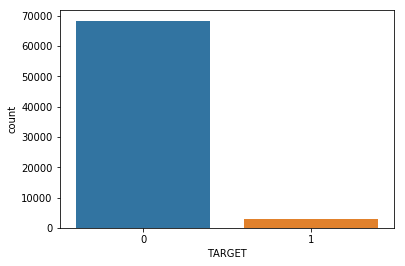

In [16]:
sns.countplot('TARGET',data=treinodf)

In [17]:
#importando o pacote a funçõa smote para fazer o balanceamento dos dados
from imblearn.over_sampling import SMOTE 

In [18]:
#separando o dataset em variaveis preditoras e variavel target
x = treinodf.iloc[:,0:335]
y = treinodf.iloc[:,335]

In [19]:
#aplicando o smote
#Nessa parte fiquei em duvida. Não sabia qual valor atribuir ao random_state
sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(x,y)

In [20]:
#essa fooi outra parte que me gerou duvida
#Foram criados mais registros. Isso é comum?
y_res.value_counts()

1    68398
0    68398
Name: TARGET, dtype: int64

In [21]:
nrow = 136796
((x_res==0).sum(axis=0))

var3                                189
var15                                 0
imp_ent_var16_ult1               127314
imp_op_var39_comer_ult1          116600
imp_op_var39_comer_ult3          113040
imp_op_var40_comer_ult1          136067
imp_op_var40_comer_ult3          135950
imp_op_var40_efect_ult1          136412
imp_op_var40_efect_ult3          136373
imp_op_var40_ult1                136171
imp_op_var41_comer_ult1          116758
imp_op_var41_comer_ult3          113190
imp_op_var41_efect_ult1          121469
imp_op_var41_efect_ult3          117362
imp_op_var41_ult1                113462
imp_op_var39_efect_ult1          121455
imp_op_var39_efect_ult3          117350
imp_op_var39_ult1                113325
imp_sal_var16_ult1               136355
ind_var1_0                       135828
ind_var1                         136447
ind_var5_0                        10572
ind_var5                          75784
ind_var6_0                       136788
ind_var6                         136794


In [22]:
#como ainda há 336 colunas no dataset e o que eu assistir nas aulas, achei uma boa oportunidade de aplicar o pca
#Essa foi uma outra parte que me gerou duvidas. Não sabia como determinar o numero de componentes do pca
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

scaler = Normalizer()
rescaledx = scaler.fit_transform(x_res)

pca = PCA(n_components=9)
pca_x = pca.fit_transform(rescaledx)

In [23]:
novo_df = pd.DataFrame(pca_x)

In [24]:
novo_df

,0,1,2,3,4,5,6,7,8
0,-0.050408,0.000813,0.002705,-0.007562,0.002638,0.000684,-0.001006,0.001048,-0.000327
1,-0.043271,0.011106,-0.004216,-0.009256,0.000715,-0.002636,-0.000890,-0.000148,0.003722
2,-0.050379,0.000798,0.002675,-0.007479,0.002607,0.000685,-0.001036,0.001039,-0.000322
3,-0.049520,0.000369,0.001798,-0.004045,0.001133,0.000664,-0.001325,0.001066,-0.000256
4,0.872105,-0.428893,-0.025080,0.122306,-0.035758,0.113715,0.567275,-0.212963,-0.041750
5,-0.050409,0.000813,0.002706,-0.007560,0.002641,0.000696,-0.001015,0.001028,-0.000327
6,-0.050387,0.000802,0.002684,-0.007501,0.002616,0.000691,-0.001032,0.001030,-0.000323
7,-0.050400,0.000809,0.002698,-0.007536,0.002633,0.000701,-0.001026,0.001019,-0.000325
8,-0.050409,0.000813,0.002706,-0.007560,0.002641,0.000698,-0.001016,0.001026,-0.000327
9,-0.050402,0.000810,0.002701,-0.007542,0.002636,0.000702,-0.001025,0.001017,-0.000325


LR: 0.567780 (0.002913)
CART: 0.677242 (0.001444)
KNN: 0.828138 (0.002015)
NB: 0.546478 (0.002043)
LDA: 0.564381 (0.002493)


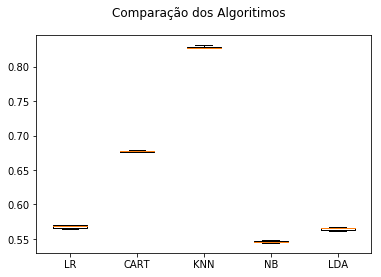

In [25]:
#carraguei os pacotes necessários para criar e treinar o modelo
#eu tentei usar o svc mais demorou muito para treinar no meu computador, por isso decidi tira-lo após algumas tentativas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


n_folds = 3

modelos = []

modelos.append(('LR',LogisticRegression()))
modelos.append(('CART',DecisionTreeClassifier()))
modelos.append(('KNN',KNeighborsClassifier()))
modelos.append(('NB',GaussianNB()))
modelos.append(('LDA',LinearDiscriminantAnalysis()))

resultados = []
nomes = []

for nome,modelo in modelos:
    kfold = KFold(n_splits=n_folds,random_state=42,shuffle=True)
    cv_results = cross_val_score(modelo,novo_df,y_res,cv=kfold,scoring='accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = '%s: %f (%f)' % (nome, cv_results.mean(),cv_results.std())
    print(msg)
    
    
fig = plt.figure()
fig.suptitle('Comparação dos Algoritimos')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()    

Tentando outros modelos

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

n_trees = 15
n_fold = 6

kfold = KFold(n_splits=n_fold,random_state=42,shuffle=True)

modelo2 = GradientBoostingClassifier(n_estimators=n_trees,random_state=42)

resultado = cross_val_score(modelo2,novo_df,y_res,cv=kfold)


print('Acurácia: %.3f' % (resultado.mean()*100))

Acurácia: 63.651


#### Como foi visto nas aulas, tentei criar outros modelos. Não sei se os fiz certo.
#### O que apresentou melhor acurácia foi o kneighbors classifier com gridsearchcv.


In [27]:
from sklearn.ensemble import AdaBoostClassifier

n_trees = 20
n_fold = 6

kfold = KFold(n_splits=n_fold,random_state=42,shuffle=True)

modelo3 = AdaBoostClassifier(n_estimators=n_trees,random_state=42)

resultado = cross_val_score(modelo3,novo_df,y_res,cv=kfold)

print('Acurácia: %.3f' % (resultado.mean()*100))

Acurácia: 63.275


In [37]:
#Usando o knn com o gridsearchcv com dados de treino e teste e avaliando a sua performance
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



valores_grid = {'n_neighbors':[3,5,11,19],'weights':['uniform','distance'], 'metric':['euclidean','manhattan']}

modelo = KNeighborsClassifier()

x_treino,x_teste,y_treino,y_teste = train_test_split(novo_df,y_res,test_size=0.30)

grid = GridSearchCV(estimator = modelo, param_grid = valores_grid)

grid.fit(x_treino,y_treino)

y_pred = grid.predict(x_teste)



print('Acurácia: %.3f' % (grid.best_score_*100))
print('Melhores parametros do Modelo:\n',grid.best_estimator_)

Acurácia: 83.803
Melhores parametros do Modelo:
 KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')


In [38]:
classification_report(y_teste,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.88      0.82      0.85     20443\n           1       0.83      0.88      0.86     20596\n\n    accuracy                           0.85     41039\n   macro avg       0.85      0.85      0.85     41039\nweighted avg       0.85      0.85      0.85     41039\n'

In [39]:
accuracy_score(y_teste,y_pred)

0.8508979263627281

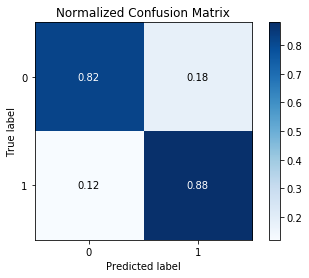

In [44]:
from scikitplot.metrics import plot_confusion_matrix
plot_confusion_matrix(y_teste,y_pred,normalize=True)
plt.show()